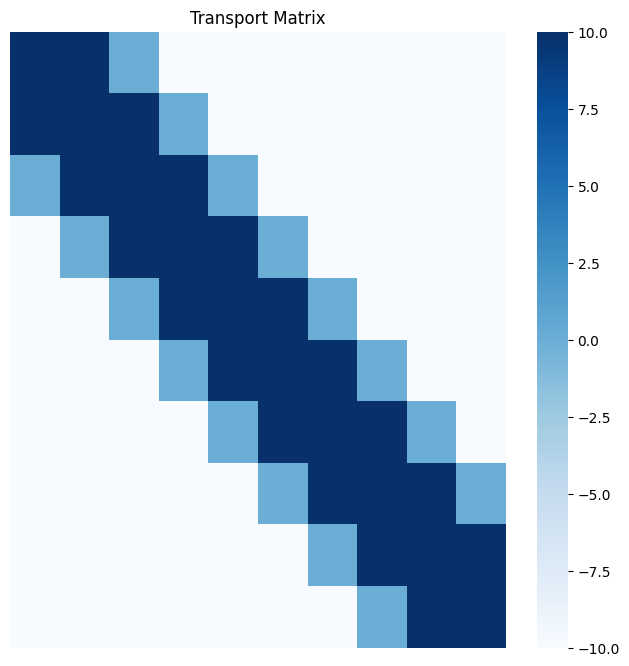

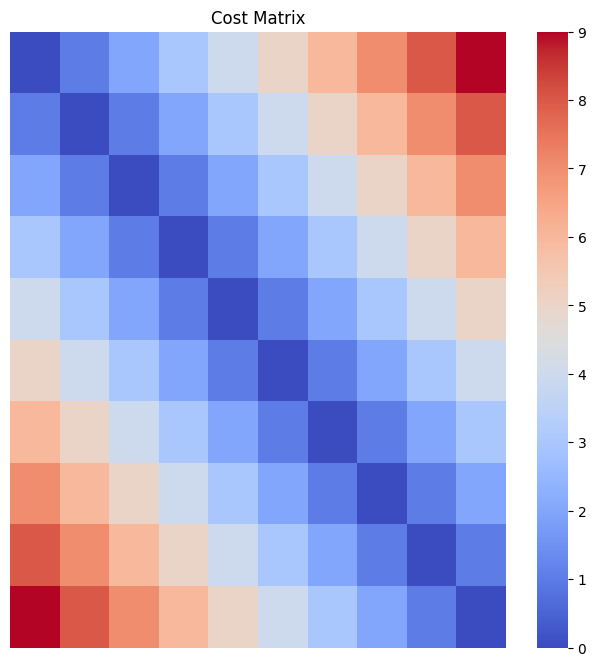

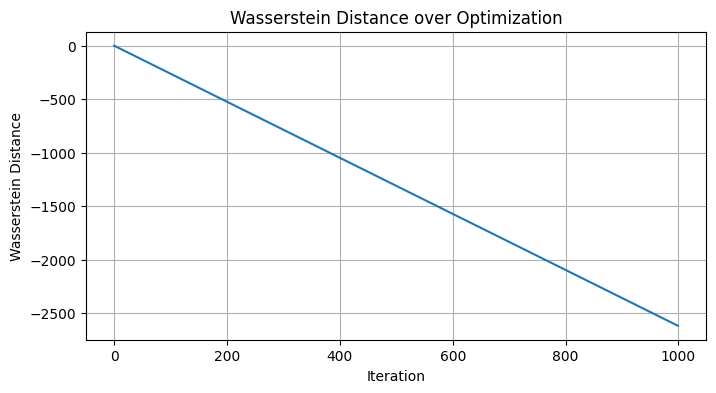

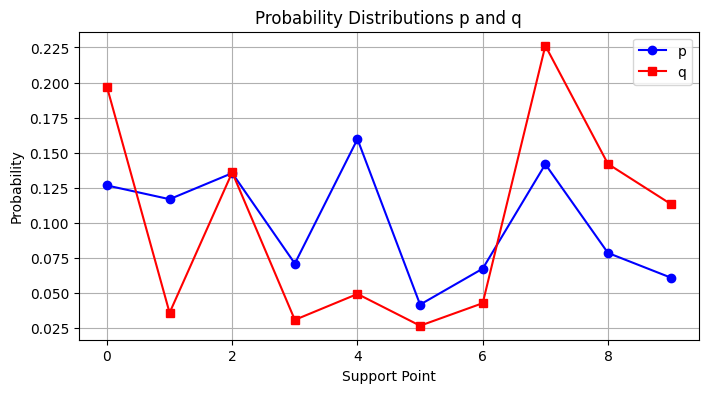

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import seaborn as sns

# Define the two probability distributions p and q
n, m = 10, 10  # Probability distributions of size 10
p = torch.rand(n)
q = torch.rand(m)

# Normalize the distributions to have a total area of 1
p /= p.sum()
q /= q.sum()

# Create a cost matrix based on the distance between elements in the support
cost_matrix = torch.zeros((n, m), dtype=torch.float)

for i in range(n):
    for j in range(m):
        cost_matrix[i][j] = torch.abs(torch.tensor(i - j, dtype=torch.float))

# Set up the optimization problem to compute the Wasserstein distance
T = nn.Parameter(torch.zeros((n, m), requires_grad=True))

# Define the optimizer
optimizer = optim.Adam([T], lr=0.01)

# Number of optimization steps
num_steps = 1000

# Lists to store Wasserstein distances during optimization
wasserstein_distances = []

# Lists to store distributions p and q for plotting
p_values = []
q_values = []

# Optimization loop to find the optimal transport matrix T and plot Wasserstein distances
for step in range(num_steps):
    optimizer.zero_grad()

    # Calculate the cost of transporting the mass from p to q
    transport_cost = torch.sum(T * cost_matrix)

    # Ensure that the transport matrix sums to the correct marginals
    row_marginals = torch.sum(T, dim=1, keepdim=True)
    col_marginals = torch.sum(T, dim=0, keepdim=True)

    loss = torch.sum(T * cost_matrix) + torch.norm(row_marginals - p.view(-1, 1), p=1) + torch.norm(col_marginals - q.view(1, -1), p=1)
    loss.backward()
    optimizer.step()

    wasserstein_distances.append(transport_cost.item())
    p_values.append(p.detach().numpy())
    q_values.append(q.detach().numpy())

# Plot the Transport matrix
plt.figure(figsize=(8, 8))
sns.heatmap(T.detach().numpy(), cmap="Blues", xticklabels=False, yticklabels=False)
plt.title("Transport Matrix")
plt.show()

# Plot the Cost matrix
plt.figure(figsize=(8, 8))
sns.heatmap(cost_matrix.numpy(), cmap="coolwarm", xticklabels=False, yticklabels=False)
plt.title("Cost Matrix")
plt.show()

# Plot Wasserstein distances over iterations
plt.figure(figsize=(8, 4))
plt.plot(range(num_steps), wasserstein_distances)
plt.title("Wasserstein Distance over Optimization")
plt.xlabel("Iteration")
plt.ylabel("Wasserstein Distance")
plt.grid()
plt.show()

# Plot probability distributions p and q
plt.figure(figsize=(8, 4))
plt.plot(range(n), p_values[-1], label='p', color='blue', marker='o')
plt.plot(range(m), q_values[-1], label='q', color='red', marker='s')
plt.title("Probability Distributions p and q")
plt.xlabel("Support Point")
plt.ylabel("Probability")
plt.legend()
plt.grid()
plt.show()


Wasserstein Distance: 0.8686


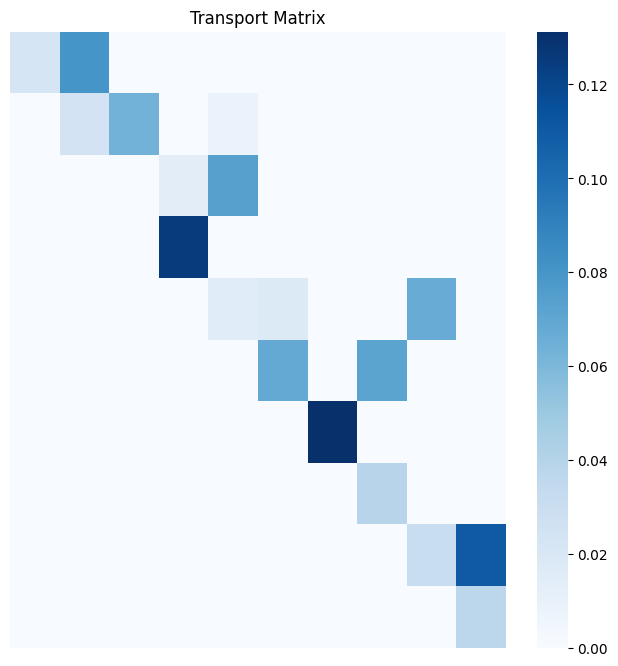

In [2]:
import numpy as np
import scipy.optimize as opt
import matplotlib.pyplot as plt
import seaborn as sns

# Define the two probability distributions p and q
n, m = 10, 10  # Probability distributions of size 10
p = np.random.rand(n)
q = np.random.rand(m)

# Normalize the distributions to have a total area of 1
p /= p.sum()
q /= q.sum()

# Create a cost matrix based on the distance between elements in the support
cost_matrix = np.zeros((n, m), dtype=float)

for i in range(n):
    for j in range(m):
        cost_matrix[i][j] = np.abs(i - j)

# Flatten the cost matrix for the linear programming
c = cost_matrix.flatten()

# Define equality constraints for row and column sums
A_eq = []
b_eq = np.concatenate((p, q))

for i in range(n):
    row_constraint = np.zeros(n * m)
    row_constraint[i * m: (i + 1) * m] = 1
    A_eq.append(row_constraint)

for j in range(m):
    col_constraint = np.zeros(n * m)
    col_constraint[j::m] = 1
    A_eq.append(col_constraint)

# Use linear programming to find the optimal transport plan
result = opt.linprog(c, A_eq=A_eq, b_eq=b_eq, method="highs")

# Reshape the result into a matrix
T = result.x.reshape((n, m))

# Calculate the Wasserstein distance
wasserstein_distance = np.sum(T * cost_matrix)

print(f'Wasserstein Distance: {wasserstein_distance:.4f}')

# Plot the Transport matrix
plt.figure(figsize=(8, 8))
sns.heatmap(T, cmap="Blues", xticklabels=False, yticklabels=False)
plt.title("Transport Matrix")
plt.show()


Wasserstein Distance: 1.9079


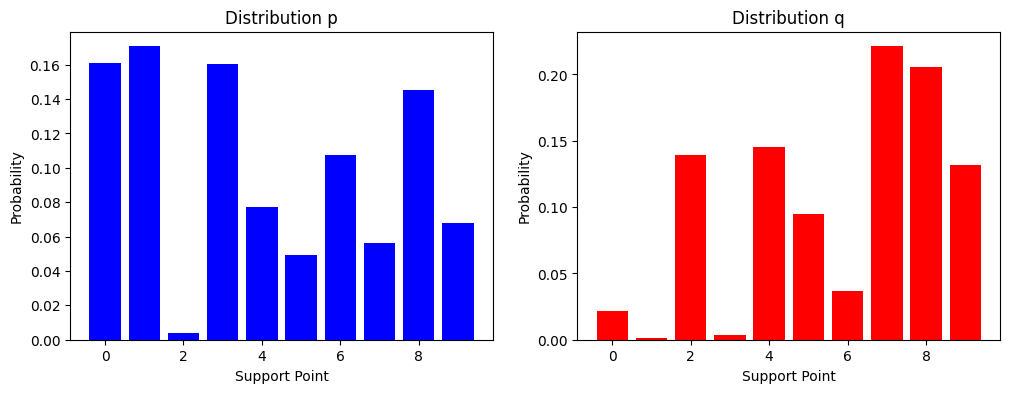

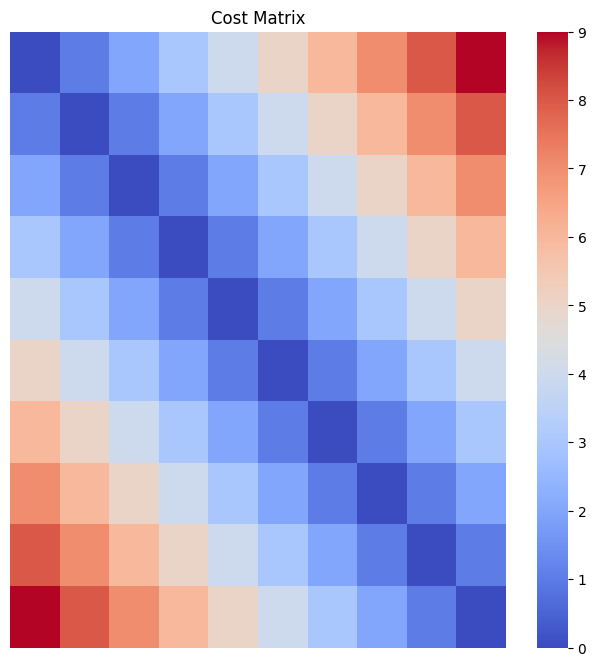

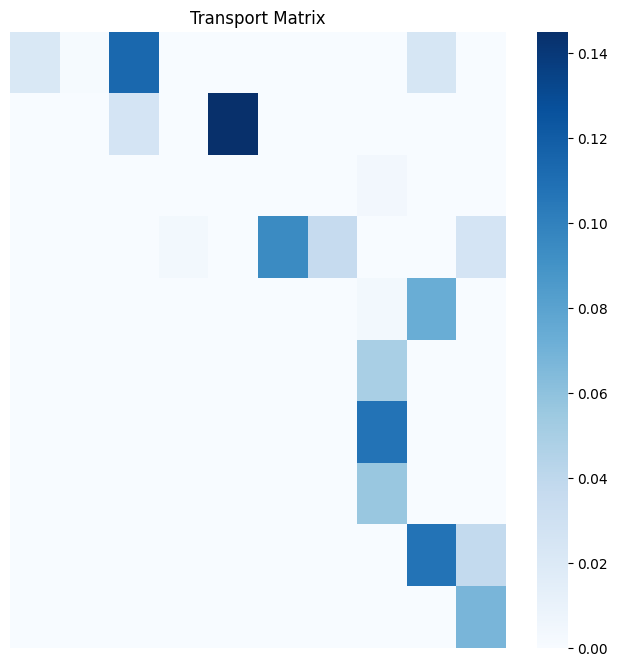

In [3]:
import numpy as np
import scipy.optimize as opt
import matplotlib.pyplot as plt
import seaborn as sns

# Define the two probability distributions p and q
n, m = 10, 10  # Probability distributions of size 10
p = np.random.rand(n)
q = np.random.rand(m)

# Normalize the distributions to have a total area of 1
p /= p.sum()
q /= q.sum()

# Create a cost matrix based on the distance between elements in the support
cost_matrix = np.zeros((n, m), dtype=float)

for i in range(n):
    for j in range(m):
        cost_matrix[i][j] = np.abs(i - j)

# Flatten the cost matrix for the linear programming
c = cost_matrix.flatten()

# Define equality constraints for row and column sums
A_eq = []
b_eq = np.concatenate((p, q))

for i in range(n):
    row_constraint = np.zeros(n * m)
    row_constraint[i * m: (i + 1) * m] = 1
    A_eq.append(row_constraint)

for j in range(m):
    col_constraint = np.zeros(n * m)
    col_constraint[j::m] = 1
    A_eq.append(col_constraint)

# Use linear programming to find the optimal transport plan
result = opt.linprog(c, A_eq=A_eq, b_eq=b_eq, method="highs")

# Reshape the result into a matrix
T = result.x.reshape((n, m))

# Calculate the Wasserstein distance
wasserstein_distance = np.sum(T * cost_matrix)

print(f'Wasserstein Distance: {wasserstein_distance:.4f}')

# Plot the Probability Distributions p and q
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.bar(range(n), p, label='p', color='blue')
plt.title("Distribution p")
plt.xlabel("Support Point")
plt.ylabel("Probability")

plt.subplot(1, 2, 2)
plt.bar(range(m), q, label='q', color='red')
plt.title("Distribution q")
plt.xlabel("Support Point")
plt.ylabel("Probability")
plt.show()

# Plot the Cost Matrix
plt.figure(figsize=(8, 8))
sns.heatmap(cost_matrix, cmap="coolwarm", xticklabels=False, yticklabels=False)
plt.title("Cost Matrix")
plt.show()

# Plot the Transport Matrix
plt.figure(figsize=(8, 8))
sns.heatmap(T, cmap="Blues", xticklabels=False, yticklabels=False)
plt.title("Transport Matrix")
plt.show()


Wasserstein Distance: -2617.4001


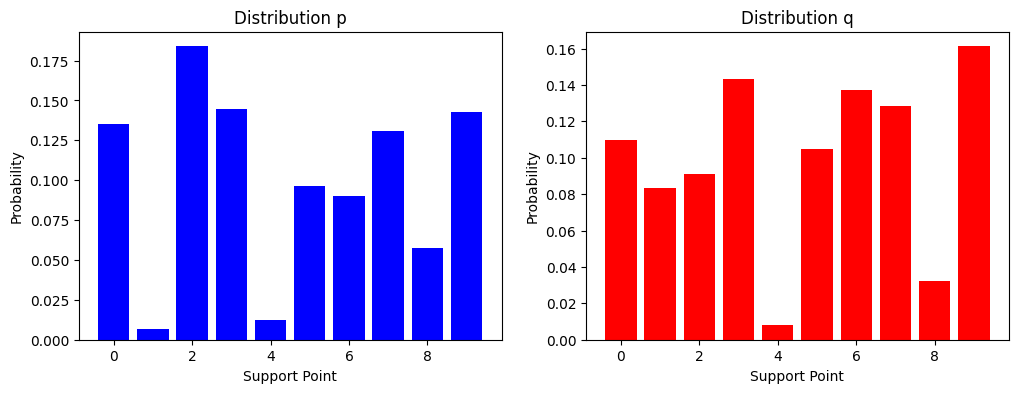

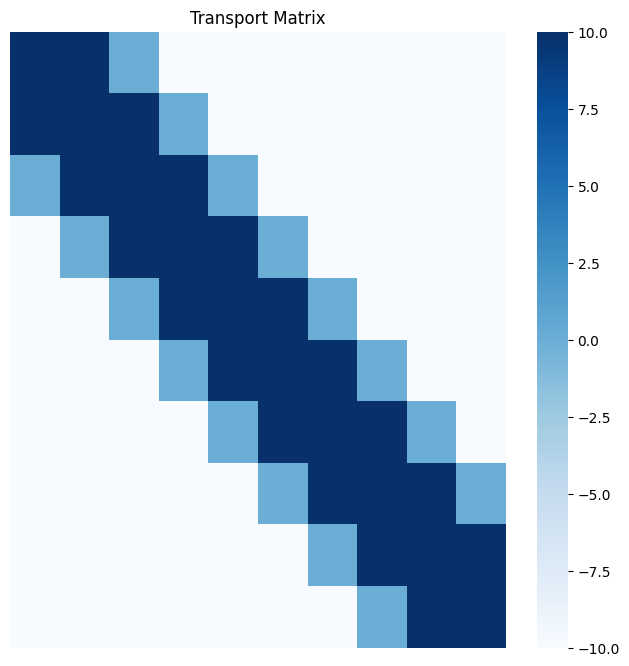

In [4]:
import torch
import torch.optim as optim
import matplotlib.pyplot as plt
import seaborn as sns

# Define the two probability distributions p and q
n, m = 10, 10  # Probability distributions of size 10
p = torch.rand(n, dtype=torch.float32)
q = torch.rand(m, dtype=torch.float32)

# Normalize the distributions to have a total area of 1
p /= p.sum()
q /= q.sum()

# Create a cost matrix based on the distance between elements in the support
cost_matrix = torch.zeros((n, m), dtype=torch.float32)

for i in range(n):
    for j in range(m):
        cost_matrix[i][j] = abs(i - j)

# Set up the optimization problem to compute the Wasserstein distance
T = torch.nn.Parameter(torch.zeros((n, m), requires_grad=True, dtype=torch.float32))

# Define the optimizer
optimizer = optim.Adam([T], lr=0.01)

# Number of optimization steps
num_steps = 1000

# Lists to store Wasserstein distances during optimization
wasserstein_distances = []

# Lists to store distributions p and q for plotting
p_values = []
q_values = []

# Optimization loop to find the optimal transport matrix T and plot Wasserstein distances
for step in range(num_steps):
    optimizer.zero_grad()

    # Calculate the cost of transporting the mass from p to q
    transport_cost = torch.sum(T * cost_matrix)

    # Ensure that the transport matrix sums to the correct marginals
    row_marginals = torch.sum(T, dim=1, keepdim=True)
    col_marginals = torch.sum(T, dim=0, keepdim=True)

    loss = torch.sum(T * cost_matrix) + torch.norm(row_marginals - p.view(-1, 1), p=1) + torch.norm(col_marginals - q.view(1, -1), p=1)
    loss.backward()
    optimizer.step()

    wasserstein_distances.append(transport_cost.item())
    p_values.append(p.cpu().numpy())
    q_values.append(q.cpu().numpy())

# Calculate the final Wasserstein distance
wasserstein_distance = transport_cost.item()

print(f'Wasserstein Distance: {wasserstein_distance:.4f}')

# Plot the Probability Distributions p and q
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.bar(range(n), p_values[-1], label='p', color='blue')
plt.title("Distribution p")
plt.xlabel("Support Point")
plt.ylabel("Probability")

plt.subplot(1, 2, 2)
plt.bar(range(m), q_values[-1], label='q', color='red')
plt.title("Distribution q")
plt.xlabel("Support Point")
plt.ylabel("Probability")
plt.show()

# Plot the Transport Matrix
plt.figure(figsize=(8, 8))
sns.heatmap(T.detach().numpy(), cmap="Blues", xticklabels=False, yticklabels=False)
plt.title("Transport Matrix")
plt.show()
